(analysis-notebook)=

# Data Ingestion and Analysis

PIVA includes a continuously expanding library of analysis routines and procedures, which, along with detailed documentation, can be found in the module [working_procedures](sec-working_procedures-file). While the module can be imported and used in any environment of the user’s choice, the following example demonstrates how data ingestion and initial analysis can be performed using a Jupyter Notebook template and the export tools embedded in PIVA.

More details on exporting workspaces between the PIVA GUI and Jupyter Notebook can be found [here](sec-utilities-panel-file).

To provide step-by-step instructions, from loading the data file to displaying the fitting results, the following example demonstrates a generic case of determining the Fermi level correction and the experimental energy resolution based on a measurement of polycrystalline gold. 

Presented example can be tested by <a href="Au-test_spectrum.p" download>downloading the data</a>.

In [5]:
# import relevant packages

# piva packages
import piva.data_loaders as dl
import piva.working_procedures as wp
# general python utilities
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import interactive
import pandas as pd
# from scipy import optimize as opt

# use "matplotlib qt" to open plots in an interactive window
use_qt = False
if use_qt:
    %matplotlib qt
else:
    %matplotlib inline

In [6]:
# load file and extract data for easier access
path = './'
fname = 'Au-test_spectrum.p'
dataset = dl.load_data(path + fname)
data, slit_ax, erg_ax = dataset.data[0, :, :], dataset.yscale, dataset.zscale

## Fit Fermi-Dirac Distribution

Plot the raw spectrum, prepare the data for analysis, and fit the Fermi-Dirac function using the `fit_fermi_dirac` method.

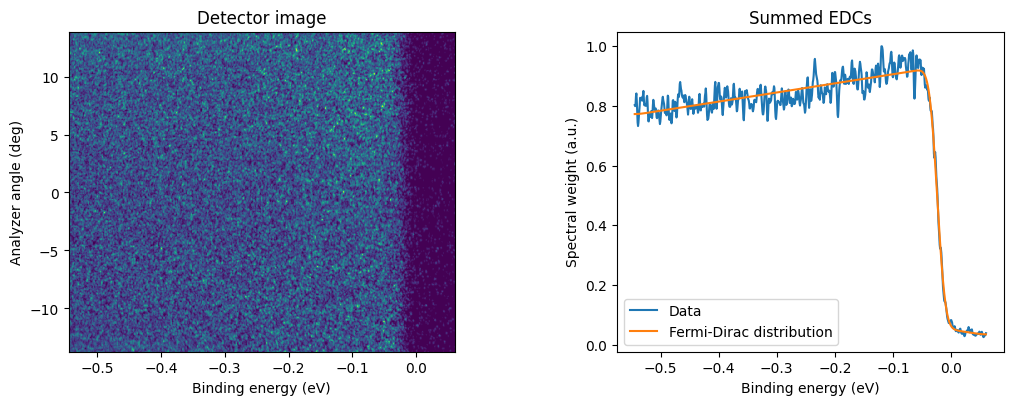

In [7]:
# plot and fit the measured scan
fig = plt.figure(figsize=[11, 4])
gs = fig.add_gridspec(1, 2, wspace=0.42, hspace=0.25, top=0.9, bottom=0.1, left=0.1, right=0.95)
ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])

# display the detector image
ee, kk = np.meshgrid(erg_ax, slit_ax)

ax00.pcolormesh(ee, kk, data)
ax00.set_title('Detector image')
ax00.set_xlabel('Binding energy (eV)')
ax00.set_ylabel('Analyzer angle (deg)')


# analyze the data
edc = wp.normalize(np.sum(data, axis=0))                        # summarize all angular channels
ε0 = erg_ax[wp.detect_step(edc)]                                # find initial guess for E_F

res = wp.fit_fermi_dirac(erg_ax, edc, ε0, T=dataset.temp)       # fit Fermi-Dirac distrubution with a Gausian component
par, fit_func, cov, resol, Δresol = res                         # extract fitting results
Fermi_Dirac = fit_func(erg_ax)                                  # get the Fermi-Dirac distribution

# plot the summed EDC and the fitted curve
ax01.plot(erg_ax, edc, label='Data')
ax01.plot(erg_ax, Fermi_Dirac, label='Fermi-Dirac distribution')
ax01.set_title('Summed EDCs')
ax01.set_xlabel('Binding energy (eV)')
ax01.set_ylabel('Spectral weight (a.u.)')
ax01.legend();

### Fit results

Display the fit results for comparison.

In [8]:
Ef  = '{:.2f}'.format(par[0] * 1000)
ΔEf = '{:.2f}'.format(np.sqrt(np.diag(cov)[0]) * 1000)
σ   = '{:.2f}'.format(resol * 1000)
Δσ  = '{:.2f}'.format(Δresol * 1000)

df = {'scan name':[fname], 'Ef, meV':[Ef], 'Ef error, meV':[ΔEf], 'resolution, meV':[σ], 'resolution error, meV':[Δσ]}
df = pd.DataFrame(data=df)
df

,scan name,"Ef, meV","Ef error, meV","resolution, meV","resolution error, meV"
0,Au-test_spectrum.p,-23.49,0.24,25.01,0.82


## Contributing

We encourage everyone to share their tested, self-written analysis and modeling procedures with
the community by adding them to PIVA's source code. This can be done
ideally [directly through GitHub](https://github.com/pudeIko/piva) or
alternatively by contacting the development team:

[Wojtek Pudelko](mailto:wojciech.pudelko@psi.ch) and [Kevin Kramer](mailto:kevin.pasqual.kramer@proton.me)
